In [11]:
import math
import os
import string
import random
from random import shuffle
import numpy as np
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from PIL import Image
from keras.regularizers import l2
from keras.models import load_model

In [2]:
path = 'english-alphabets'

In [3]:
folders = []
for i in os.listdir(path):
    folders.append(os.path.join(path, i))

In [6]:
img_paths = []
for folder in folders:
    for img_path in os.listdir(folder):
        img_paths.append(os.path.join(folder, img_path))
shuffle(img_paths)

In [7]:
data = []
for i in img_paths:
    im = cv2.imread(i)
    im = cv2.resize(im, (28,28))
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im = cv2.equalizeHist(im)
    im,thre = cv2.threshold(im,127,255, cv2.THRESH_BINARY)
    np_im = np.array(thre)
    data.append(np_im)

In [15]:
labels = []
for i in img_paths:
    labels.append(i[18])

In [16]:
for i, j in enumerate(labels):
    for index, item in enumerate(list(string.ascii_uppercase)):
        if j == item:
            labels[i] = index

In [18]:
labels = to_categorical(labels, 26)

In [19]:
labels

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Text(0.5, 1.0, '2')

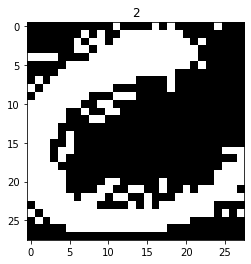

In [24]:
plt.imshow(data[100], cmap='gray')
plt.title(np.argmax(labels[100]))

In [25]:
data = np.array(data)

In [26]:
data.shape

(6759, 28, 28)

In [27]:
data = data.reshape(data.shape[0], 28, 28 ,1)

In [28]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.1, random_state=25)

In [29]:
model = Sequential()
 
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Thêm Conv layer:
model.add(Conv2D(64, (5,5), activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01) ))
# Flatten layer chuyển từ tensor sang vector

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=26, activation='softmax'))

In [30]:
opt = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [33]:
H = model.fit(x=train_data, y=train_labels, batch_size=64, epochs=12, validation_data=(test_data, test_labels))

Epoch 1/12
96/96 [==============================] - 2s 23ms/step - loss: 1.2350 - accuracy: 0.7952 - val_loss: 0.9087 - val_accuracy: 0.8802
Epoch 2/12
96/96 [==============================] - 2s 22ms/step - loss: 1.1299 - accuracy: 0.8180 - val_loss: 0.8223 - val_accuracy: 0.8876
Epoch 3/12
96/96 [==============================] - 2s 25ms/step - loss: 0.9816 - accuracy: 0.8448 - val_loss: 0.7636 - val_accuracy: 0.9068
Epoch 4/12
96/96 [==============================] - 2s 23ms/step - loss: 0.8807 - accuracy: 0.8698 - val_loss: 0.7642 - val_accuracy: 0.9142
Epoch 5/12
96/96 [==============================] - 2s 24ms/step - loss: 0.8778 - accuracy: 0.8642 - val_loss: 0.7372 - val_accuracy: 0.9098
Epoch 6/12
96/96 [==============================] - 2s 25ms/step - loss: 0.8112 - accuracy: 0.8849 - val_loss: 0.6700 - val_accuracy: 0.9260
Epoch 7/12
96/96 [==============================] - 2s 23ms/step - loss: 0.7240 - accuracy: 0.9040 - val_loss: 0.7028 - val_accuracy: 0.9172
Epoch 8/12
96

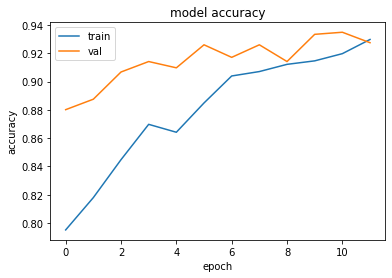

In [34]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

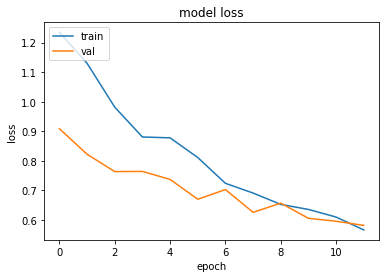

In [35]:
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [82]:
img = '1.jpg'

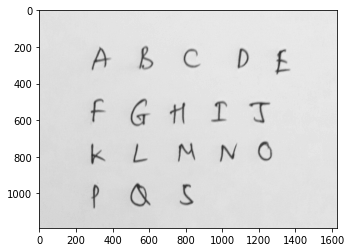

In [83]:
img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

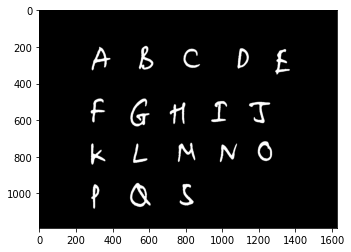

In [84]:
im,thre = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(thre, cmap='gray')

In [85]:
contours, hierachy = cv2.findContours(thre,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(cnt) for cnt in contours]

In [86]:
test_data = []
for i in contours:
    (x,y,w,h) = cv2.boundingRect(i)
    if w>15 and h>15:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)
        roi= thre[y:y+h,x:x+w]
        roi = cv2.resize(roi,(28,28))
        roi = np.array(roi)
        test_data.append(roi)
new_data = [i.reshape(1,28,28,1) for i in test_data]

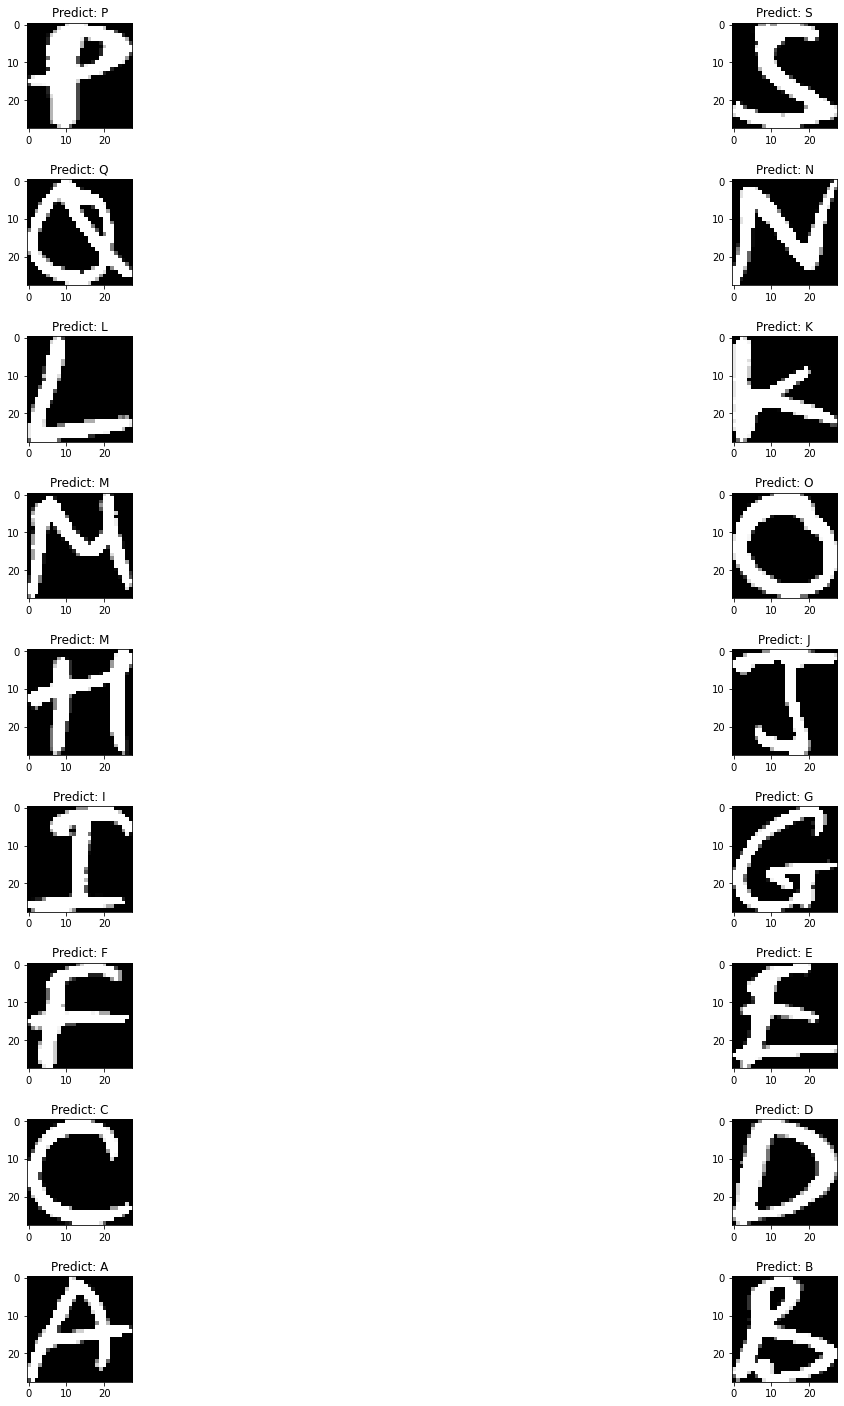

In [89]:
fig,ax=plt.subplots(math.ceil(len(test_data) / 2),2)
fig.set_size_inches(20,20)
fig.tight_layout(pad=3.0)
count  = 0
try:
    for i in range(math.ceil(len(test_data) / 2)):
        for j in range(2):
            ax[i][j].imshow(test_data[count], cmap='gray')
            ax[i][j].set_title('Predict: {}'.format(string.ascii_uppercase[np.argmax(model.predict(new_data[count]))]))
            count += 1
except IndexError:
    pass

In [90]:
model.save('1.h5')

In [35]:
import math
import string
from keras.models import load_model
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [36]:
model = load_model('1.h5')

In [37]:
img = '2.jpg'

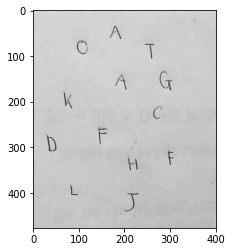

In [38]:
img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

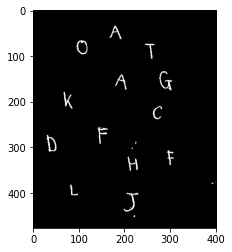

In [39]:
im,thre = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(thre, cmap='gray')

In [40]:
contours, hierachy = cv2.findContours(thre,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(cnt) for cnt in contours]

In [41]:
test_data = []
for i in contours:
    (x,y,w,h) = cv2.boundingRect(i)
    if w>15 and h>15:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)
        roi= thre[y:y+h,x:x+w]
        roi = cv2.resize(roi,(28,28))
        roi = np.array(roi)
        test_data.append(roi)
new_data = [i.reshape(1,28,28,1) for i in test_data]

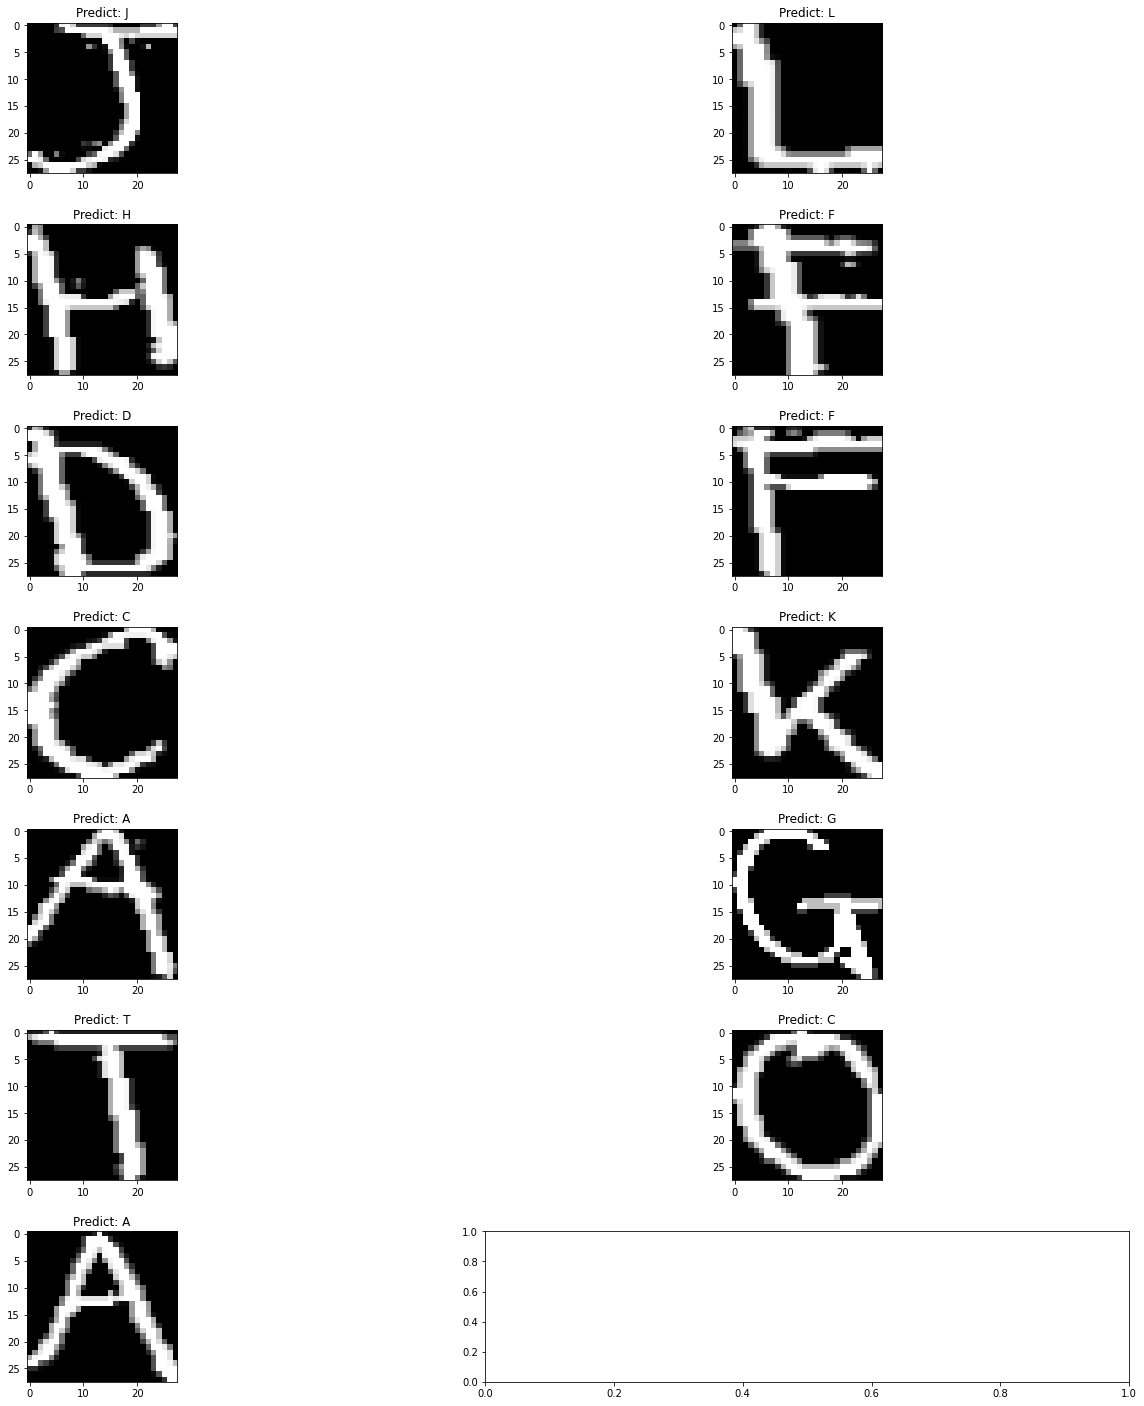

In [42]:
fig,ax=plt.subplots(math.ceil(len(test_data) / 2),2)
fig.set_size_inches(20,20)
fig.tight_layout(pad=3.0)
count  = 0
try:
    for i in range(math.ceil(len(test_data) / 2)):
        for j in range(2):
            ax[i][j].imshow(test_data[count], cmap='gray')
            ax[i][j].set_title('Predict: {}'.format(string.ascii_uppercase[np.argmax(model.predict(new_data[count]))]))
            count += 1
except IndexError:
    pass